In [48]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
stopwords = stopwords.words('english')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\FatihBeyhan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\FatihBeyhan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [49]:
# getting the extracted news as df
data1 = pd.read_csv('../data/extracted_data.csv').drop('Unnamed: 0', axis=1)
data1.columns = ['url','section','location','headline','text','label']


# getting the extracted test news as df
data2 = pd.read_csv('../data/extracted_test_data.csv').drop('Unnamed: 0', axis=1)
data2.columns = ['url','section','location','headline','text','label']

# merging headline and content as another column and create another dataframe with jusst text and label.
df1 = pd.DataFrame([data1.headline+". "+data1.text,data1.label]).transpose()
df1.columns = ['text','label']


# merging headline and content as another column and create another dataframe with jusst text and label.
df2 = pd.DataFrame([data2.headline+". "+data2.text,data2.label]).transpose()
df2.columns = ['text','label']

df = pd.concat([df1,df2])

df = df.reset_index().drop('index',axis=1)

test = pd.read_csv('../data/test.csv').drop('Unnamed: 0', axis=1)

del data1
del data2
del df1
del df2
# here is the text
df.head(5)

,text,label
0,Readers mail. SC ruling on alimony The Supreme...,0
1,"Niqaab is ‘the elephant in the courtroom’, say...",0
2,Grandparents honoured. Staff and students of G...,0
3,Fishermen call off strike. The country boat fi...,1
4,"Badal meets PM, seeks clemency for Bhullar. Pu...",0


In [74]:
class Article:
    def __init__(self,n_words,n_sent,word,sent,label):
        self.n_word = n_words
        self.n_sent = n_sent
        self.word = word
        self.sent = sent
        self.label = label

In [75]:
data1 = {}
for article in df.text.values:
    index = list(df.text.values).index(article)
    label = list(df.label.values)[index]
    sents = nltk.sent_tokenize(article)
    words = []
    for sent in nltk.sent_tokenize(article):
        words.append([i for i in nltk.word_tokenize(sent) if len(i)>1])
        
    data1[index] = Article(len([item for sublist in words for item in sublist]),len(sents),[item for sublist in words for item in sublist],sents,label)

In [76]:
data2 = {}
for article in test.text.values:
    index = list(test.text.values).index(article)
    label = None
    sents = nltk.sent_tokenize(article)
    words = []
    for sent in nltk.sent_tokenize(article):
        words.append([i for i in nltk.word_tokenize(sent) if len(i)>1])
        
    
        
    data2[index] = Article(len([item for sublist in words for item in sublist]),len(sents),[item for sublist in words for item in sublist],sents,label)

In [83]:
def len_disturbutions(d):
    sent_lens = [d[i].n_sent for i in d]
    word_lens = [d[i].n_word for i in d]
    
    sent_lens.sort()
    word_lens.sort()
    
    hist_sent = [i+(10-(i%10)) for i in sent_lens]
    hist_word = [i+(10-(i%10)) for i in word_lens]
    
    r = pd.DataFrame([hist_sent,hist_word]).transpose()
    r.columns= ['sentences','words']
    
    return r.hist() 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022BB95BF788>,
      dtype=object)

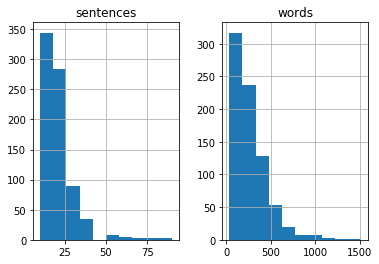

In [85]:
len_disturbutions(data1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022BB96E4BC8>,
      dtype=object)

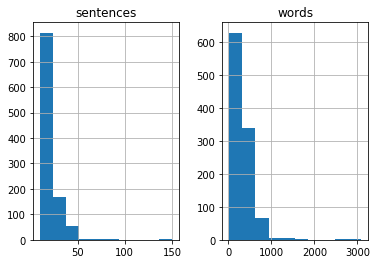

In [86]:
len_disturbutions(data2)